# wordcloud

- 가장 활용도 높은 텍스트 데이터 시각화 기법
- 문서에 사용된 단어의 중요도 또는 인기도를 시각적으로 표현하는 기법
- 출현 빈도가 큰 단어는 크게, 작은 단어는 작게 표시하여 문서에서 가장 많이 언급되고 따라서 핵심이 되는 내용을 파악할 수 있음

In [1]:
!pip install wordcloud

In [2]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = open('constitution.txt', encoding = 'cp949').read()
wordcloud = WordCloud().generate(text)

wordcloud.words_

{'State': 1.0,
 'United States': 0.8181818181818182,
 'Law': 0.5151515151515151,
 'may': 0.5,
 'Congress': 0.4393939393939394,
 'House': 0.42424242424242425,
 'President': 0.3939393939393939,
 'Section': 0.3333333333333333,
 'Person': 0.3333333333333333,
 'Office': 0.3333333333333333,
 'Year': 0.3181818181818182,
 'time': 0.30303030303030304,
 'Representative': 0.2878787878787879,
 'one': 0.2878787878787879,
 'Case': 0.2878787878787879,
 'Senate': 0.25757575757575757,
 'Power': 0.24242424242424243,
 'Constitution': 0.21212121212121213,
 'Vote': 0.21212121212121213,
 'Legislature': 0.19696969696969696,
 'thereof': 0.18181818181818182,
 'Senator': 0.18181818181818182,
 'Officer': 0.18181818181818182,
 'every': 0.16666666666666666,
 'Citizen': 0.16666666666666666,
 'Member': 0.16666666666666666,
 'make': 0.15151515151515152,
 'Consent': 0.15151515151515152,
 'Bill': 0.15151515151515152,
 'Article': 0.13636363636363635,
 'Number': 0.13636363636363635,
 'Service': 0.13636363636363635,
 'mad

# 1. simple

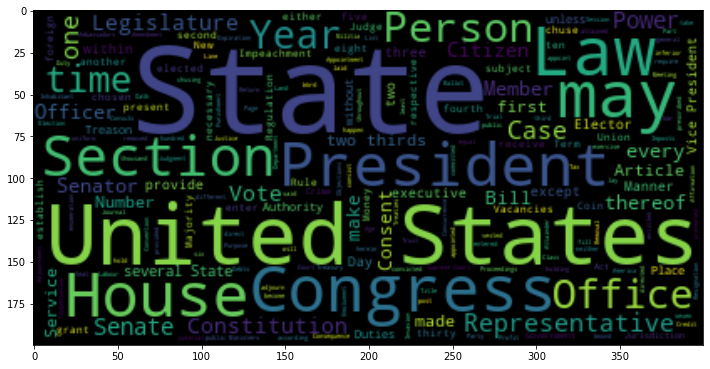

In [3]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear') 
plt.show()

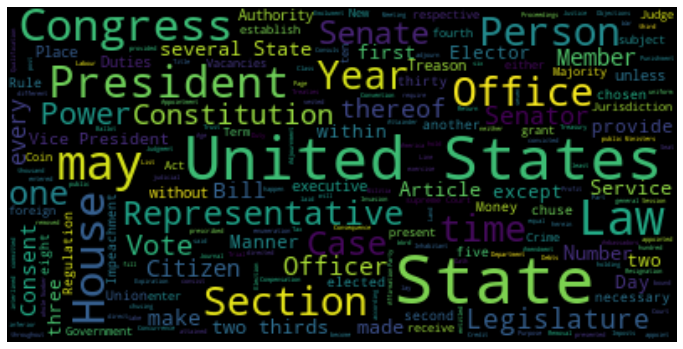

In [4]:
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 2. masked

In [5]:
import numpy as np
from PIL import Image
from wordcloud import STOPWORDS 

alice_mask = np.array(Image.open('alice_mask.png')) 
text = open('alice.txt').read()

stopwords = set(STOPWORDS) 
stopwords.add('said')
alice_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

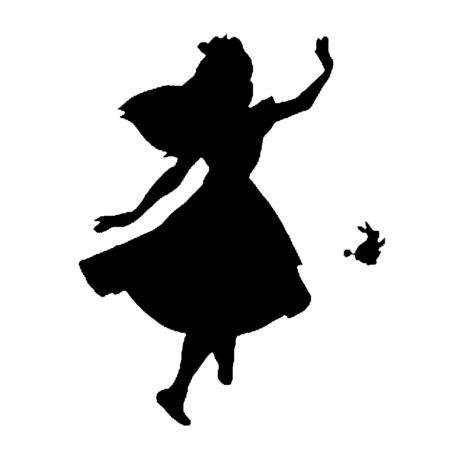

In [6]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [7]:
wc = WordCloud(background_color='white',
               max_words=2000,
               mask=alice_mask,
               stopwords=stopwords)
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.29508196721311475,
 'one': 0.27595628415300544,
 'know': 0.2459016393442623,
 'went': 0.226775956284153,
 'thing': 0.2185792349726776,
 'time': 0.2103825136612022,
 'Queen': 0.20765027322404372,
 'see': 0.1830601092896175,
 'King': 0.17486338797814208,
 'well': 0.1721311475409836,
 'now': 0.16393442622950818,
 'head': 0.16393442622950818,
 'began': 0.15846994535519127,
 'way': 0.1557377049180328,
 'Hatter': 0.1557377049180328,
 'Mock Turtle': 0.15300546448087432,
 'say': 0.15027322404371585,
 'Gryphon': 0.15027322404371585,
 'think': 0.1448087431693989,
 'quite': 0.14207650273224043,
 'much': 0.13934426229508196,
 'first': 0.13934426229508196,
 'thought': 0.1366120218579235,
 'go': 0.1366120218579235,
 'come': 0.13114754098360656,
 'never': 0.1284153005464481,
 'voice': 0.12568306010928962,
 'looked': 0.12295081967213115,
 'got': 0.12295081967213115,
 'must': 0.12021857923497267,
 'Cat': 0.12021857923497267,
 'Duchess': 0.11475409836065574,
 'Mouse': 0.11202

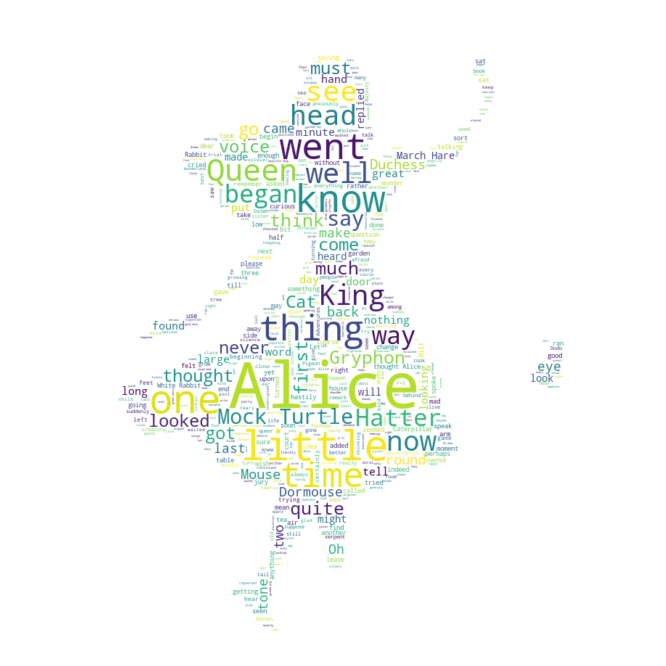

In [8]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# 3. Imaged-colored wordcloud : 마스킹 이미지의 컬러를 사용한 wordcloud

In [9]:
from wordcloud import ImageColorGenerator

alice_coloring = np.array(Image.open('alice_color.png'))
image_colors = ImageColorGenerator(alice_coloring)

wc = WordCloud(background_color='white',
               max_words=2000,
               mask=alice_coloring,
               stopwords=stopwords,
               max_font_size=40,
               random_state=42)

wc.generate(text)

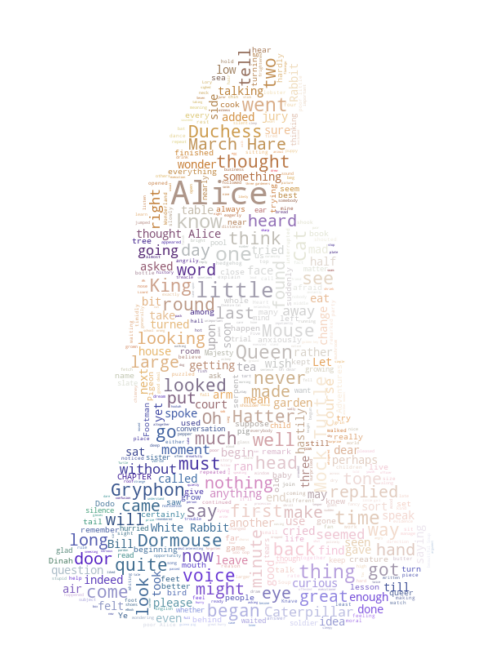

In [10]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()